#### Load Data

In [1]:
import pandas as pd
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv', index_col='Date')
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### Remove NaN values

In [3]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
cols_to_drop = [col for col in df.isnull().sum().index if df.isnull().sum()[col] > 5000]

df.drop(cols_to_drop, axis=1, inplace=True)
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

#### Convert Categorical Variables to Numerical Variables

In [6]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
cat_cols = df.select_dtypes('object').columns
df[cat_cols] = encoder.fit_transform(df[cat_cols])

#### Show Feature Correlation

[]

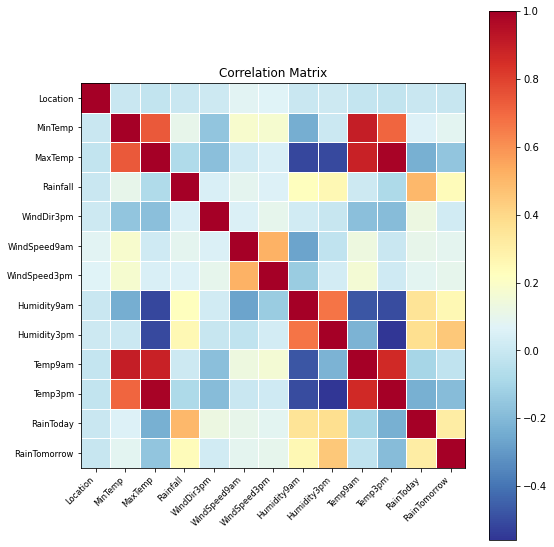

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)

corr = df.corr()
sm.graphics.plot_corr(corr, xnames=corr.columns)
plt.plot()

#### Get Predictor and Target Variables

In [8]:
X = df.drop(['RainToday', 'RainTomorrow'], axis=1)
y1 = df['RainToday']
y2 = df['RainTomorrow']

#### Model Training and Evaluation

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

seed = 0
linear = LogisticRegression(random_state=seed)
forest = RandomForestClassifier(random_state=seed)
boost = GradientBoostingClassifier(random_state=seed)
tree = DecisionTreeClassifier(random_state=seed)
svm = LinearSVC(random_state=seed)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

models = [linear, forest, boost, tree, svm]

#### Forcasting Rain Today

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y1)
for model in models:
    # train model
    model.fit(X_train, y_train)
    # make predictions
    y_pred = model.predict(X_test)
    # get accuracy
    acc = accuracy_score(y_test, y_pred)
    # display results
    print(model)
    print('=======================')
    print('Accuracy: %.2f%%'%(acc*100))
    print()

LogisticRegression(random_state=0)
Accuracy: 99.77%

RandomForestClassifier(random_state=0)
Accuracy: 100.00%

GradientBoostingClassifier(random_state=0)
Accuracy: 100.00%

DecisionTreeClassifier(random_state=0)
Accuracy: 100.00%

LinearSVC(random_state=0)
Accuracy: 99.94%



#### Forecasting Rain Tomorrow

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y2)
for model in models:
    # train model
    model.fit(X_train, y_train)
    # make predictions
    y_pred = model.predict(X_test)
    # get accuracy
    acc = accuracy_score(y_test, y_pred)
    # display results
    print(model)
    print('=======================')
    print('Accuracy: %.2f%%'%(acc*100))
    print()

LogisticRegression(random_state=0)
Accuracy: 83.01%

RandomForestClassifier(random_state=0)
Accuracy: 84.45%

GradientBoostingClassifier(random_state=0)
Accuracy: 84.35%

DecisionTreeClassifier(random_state=0)
Accuracy: 76.81%

LinearSVC(random_state=0)
Accuracy: 82.58%

